In [1]:
from lanefinder import Lanefinder
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
lanefinder = Lanefinder()

Initializing lane finder ..
Done ...


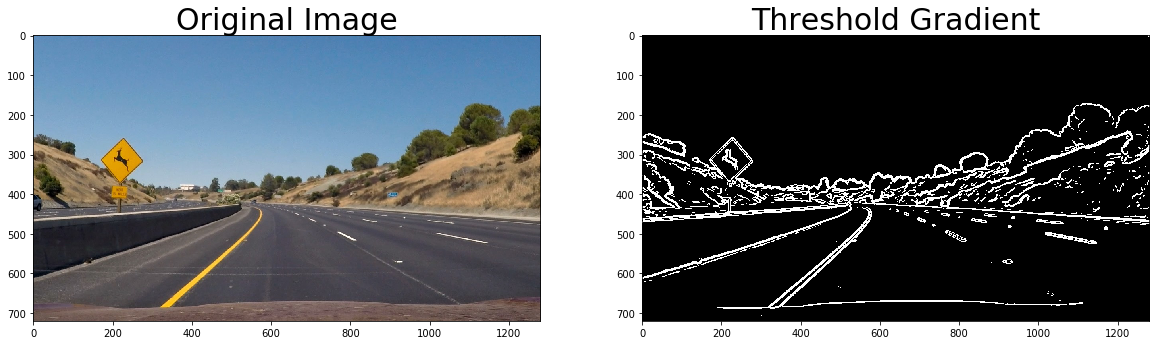

In [30]:
image = mpimg.imread("../test_images/test2.jpg")
image_threshold_gradient=lanefinder.magnitude_threshold(image, sobel_kernel=15, magnitude_threshold=(50, 200))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(image_threshold_gradient, cmap='gray')
ax12.set_title('Threshold Gradient', fontsize=30)
plt.show()

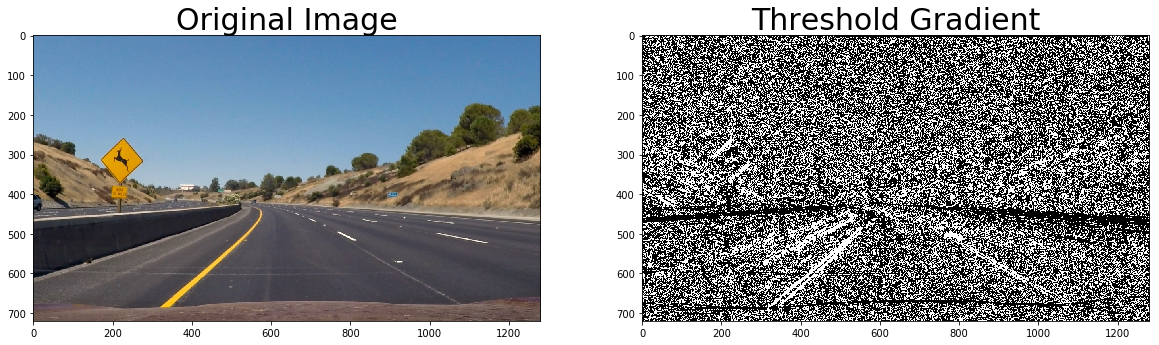

In [31]:
image = mpimg.imread("../test_images/test2.jpg")
image_threshold_gradient=lanefinder.direction_threshold(image, sobel_kernel=3, direction_threshold=(0.7, 1.3))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(image_threshold_gradient, cmap='gray')
ax12.set_title('Threshold Gradient', fontsize=30)
plt.show()